In [1]:
#import librararies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats 
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.model_selection as cross_validation
from sklearn.model_selection import cross_val_score
import os,random,math
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder # for label encoding
from sklearn.svm import SVC
from sklearn.manifold import TSNE
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# for evaluation
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# For preprocessing
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [2]:
filp='DryBeanDataset'
#function to get data
def get_data_dry(traindir=filp):
    file_ctnt=os.listdir(traindir)
    length=len(file_ctnt)
    #print("The directory has {} files : {}".format(length,traindir))
    return file_ctnt

In [3]:
file_name=get_data_dry()
#file_name

In [4]:
#import pandas as pd
#function to create dataframe from tsv(excel)
def read_data_tsv(filename):
    filename_csv= os.path.join(filp,'Dry_Bean_Dataset.xlsx')
    df = pd.read_excel(filename_csv)
    df.reset_index()
    return df  

In [5]:
df=read_data_tsv(filp)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
#creating column id with index
df['ID']=df.index
df[['ID']]

,ID
0,0
1,1
2,2
3,3
4,4
...,...
13606,13606
13607,13607
13608,13608
13609,13609


In [7]:
#daatframe description
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,6805.000000
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,3929.301592
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,3402.500000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,6805.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,10207.500000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,13610.000000


In [8]:
#dataframe inform
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  ID          

In [9]:
#checking for null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
ID                 0
dtype: int64

In [10]:
#checking for duplicates,printing size and shape of dataset
print("total duplicates :",df.duplicated().sum())
print("size : ",df.size)
print("shape : ",df.shape)

total duplicates : 0
size :  244998
shape :  (13611, 18)


The given dataset doesnot contain any null values and duplicates.There are 2,44,998 entries for the dataframe.It also shows that there are 13,611 rows nad 18 column.

In [11]:
#total count for each dry bean seed is obtained
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [12]:
#checking correlation
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.369273
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.411175
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.324677
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.502747
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,0.139467
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,0.308182
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.369615
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.418614
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.099929
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.087182


In [13]:
#copt to new daataframe
beans_df=df.copy()

In [14]:
#label encoding
la_en = LabelEncoder()
df['Class'] = la_en.fit_transform(df['Class'])
df.index

RangeIndex(start=0, stop=13611, step=1)

In [15]:
drybean_df=df.copy()
drybean_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,ID
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3,13606
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3,13607
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3,13608
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3,13609


In [16]:
drybean_df["Class"].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

SCATTERPLOT PLOTTING

In [17]:
der_bean_df=beans_df[beans_df['Class']=='DERMASON']
sir_bean_df=beans_df[beans_df['Class']=='SIRA']
sek_bean_df=beans_df[beans_df['Class']=='SERKAN']
hor_bean_df=beans_df[beans_df['Class']=='HOROZ']
cali_bean_df=beans_df[beans_df['Class']=='CALI']
bar_bean_df=beans_df[beans_df['Class']=='BARBUNYA']
bom_bean_df=beans_df[beans_df['Class']=='BOMBAR']

<AxesSubplot:xlabel='Perimeter', ylabel='EquivDiameter'>

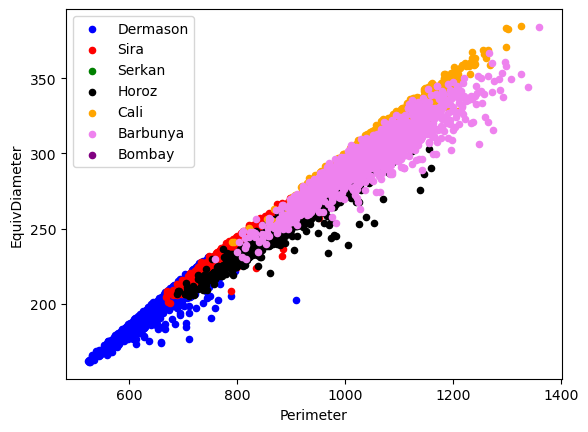

In [18]:
axes = der_bean_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='blue',label='Dermason')
sir_bean_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='red',label='Sira',ax=axes)
sek_bean_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='green',label='Serkan',ax=axes)
hor_bean_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='black',label='Horoz',ax=axes)
cali_bean_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='orange',label='Cali',ax=axes)
bar_bean_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='violet',label='Barbunya',ax=axes)
bom_bean_df.plot(kind='scatter',x='Perimeter',y='EquivDiameter',color='purple',label='Bombay',ax=axes)

BARGRAPH SEED COUNT PLOTTING

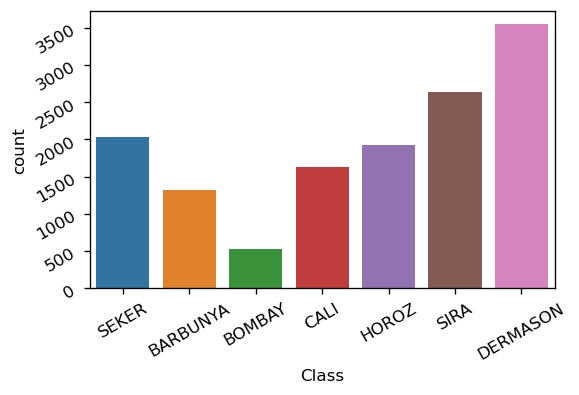

In [19]:
fig, ax = plt.subplots(1, figsize=(5, 3), dpi=120)
ax.tick_params(axis='both', rotation=30)
cplot = sns.countplot(x=beans_df['Class'], ax=ax);
cplot.set_xticklabels(cplot.get_xticklabels(), rotation = 30, );

CORRELATION HEATMAP

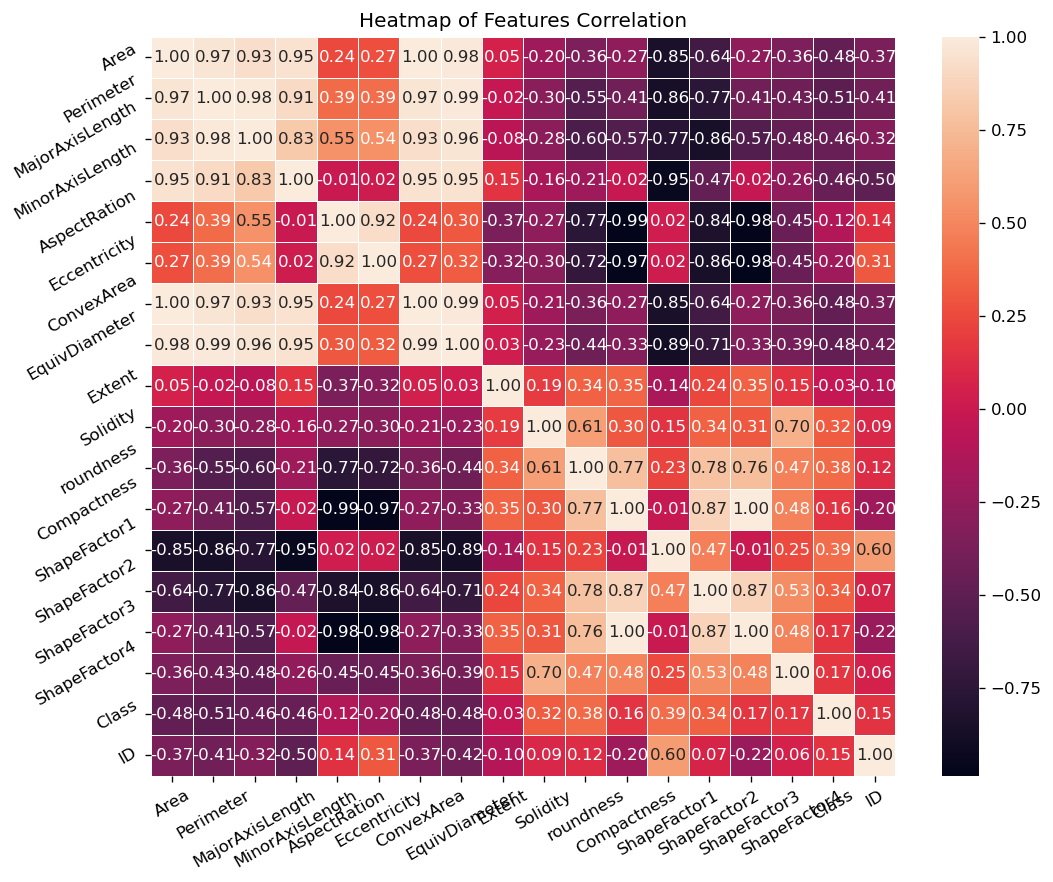

In [20]:
corr_mat = df.corr()
plt.subplots(figsize = (10, 8), dpi=120)
plt.title('Heatmap of Features Correlation')
hmap = sns.heatmap(corr_mat, linewidth = 0.5, fmt='.2f', annot=True)
hmap.set_yticklabels(hmap.get_yticklabels(), rotation = 30)
hmap.set_xticklabels(hmap.get_xticklabels(), rotation = 30);

In [21]:
bean_data=drybean_df.copy()
featureset=drybean_df.drop(['Class'],axis=1)
featureset
onlyclass_df=drybean_df[['Class']]
onlyclass_df
onlyfeatures_df=featureset.copy()
onlyfeatures_df=onlyfeatures_df[['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']]
onlyfeatures_df
ids = featureset.iloc[:, -1]
ids

0            0
1            1
2            2
3            3
4            4
         ...  
13606    13606
13607    13607
13608    13608
13609    13609
13610    13610
Name: ID, Length: 13611, dtype: int64

In [22]:
#performing standardization
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()
norm_X = normalizer.fit_transform(onlyfeatures_df)

In [23]:
#train test split
x_train,x_test,y_train,y_test, ids_train, ids_test=train_test_split(norm_X,onlyclass_df['Class'],ids,test_size=0.20, random_state=8)

In [24]:
ids_test

2894      2894
3683      3683
8012      8012
199        199
13545    13545
         ...  
13551    13551
13260    13260
6281      6281
6876      6876
3247      3247
Name: ID, Length: 2723, dtype: int64

In [25]:
#function to compute performance metrics
def compute_metrics(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y=la_en.inverse_transform(y_pred)
    y_te=la_en.inverse_transform(y_test)
    acc=accuracy_score(y_test, y_pred)
    pre=precision_score(y_test, y_pred, average='macro')
    rec=recall_score(y_test, y_pred, average='macro')
    f1=f1_score(y_test, y_pred, average='macro')
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))
    #metrics.plot_confusion_matrix(model, test_x, test_y);plt.show()
    ConfusionMatrixDisplay.from_predictions(y_te, y)
    ay=plt.gca()
    ay.set_xticklabels(ay.get_xticklabels(), fontsize=10, rotation=45)
    ay.set_yticklabels(ay.get_yticklabels(), fontsize=10, rotation=45)
    plt.show()
    print("Classification Report")
    print(classification_report(y_te,y))
    return acc,pre,rec,f1

In [26]:
#function for crossvalidation
def KFold_crossvalidation(model,X,Y):
    cv = KFold(n_splits=5, shuffle=True, random_state=12)
    scores = cross_val_score(model, X, Y, scoring='f1_macro', cv=cv, n_jobs=-1)
    print("F1 score of {} is {} ".format(model,scores))

SUPPORT VECTOR MACHINE

In [27]:
svc_model=SVC(C=2,gamma='auto',probability=True)
svc_model.fit(x_train,y_train)

SVC(C=2, gamma='auto', probability=True)

In [28]:
y_predict=svc_model.predict(x_test)

Accuracy:  0.9353654058024238
Precision:  0.9517978688509489
Recall:  0.9433308341198284
F1 Score:  0.9472033105062028


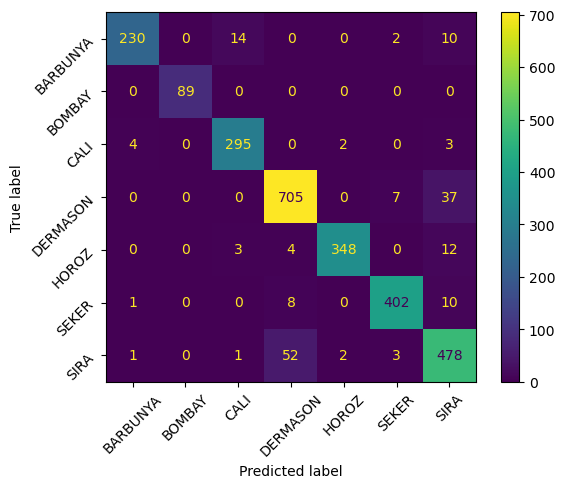

Classification Report
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.90      0.93       256
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.94      0.97      0.96       304
    DERMASON       0.92      0.94      0.93       749
       HOROZ       0.99      0.95      0.97       367
       SEKER       0.97      0.95      0.96       421
        SIRA       0.87      0.89      0.88       537

    accuracy                           0.94      2723
   macro avg       0.95      0.94      0.95      2723
weighted avg       0.94      0.94      0.94      2723



In [29]:
svm_acc,svm_pre,svm_rec,svm_f1=compute_metrics(svc_model,x_test,y_test)

In [30]:
KFold_crossvalidation(svc_model,x_test,y_test)

F1 score of SVC(C=2, gamma='auto', probability=True) is [0.93632537 0.94641068 0.92881594 0.939392   0.93706273] 


In [31]:
#optimizing SVM
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

param_grid = {
    'C': [.01, .1, 1, 5, 10],
    'gamma': [0, .01, .1, 1, 5, 10],
    'kernel': ["rbf"],
    'random_state': [1]}

gridSearch = RandomizedSearchCV(svc_model, n_iter=30, param_distributions=param_grid, scoring='accuracy', n_jobs=-1,
                                 cv=5, verbose=2, random_state=12)
gridSearch.fit(x_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Score:  0.9299219277588175
Parameters:  {'random_state': 1, 'kernel': 'rbf', 'gamma': 0.1, 'C': 5}


In [32]:
#Optimized SVM
svc_model_opt=SVC(C=5,gamma=0.1,probability=True)
svc_model_opt.fit(x_train,y_train)

SVC(C=5, gamma=0.1, probability=True)

In [33]:
y_predict_opt=svc_model_opt.predict(x_test)

Accuracy:  0.9335291957399926
Precision:  0.950112565559096
Recall:  0.941483477853054
F1 Score:  0.9454372464456051


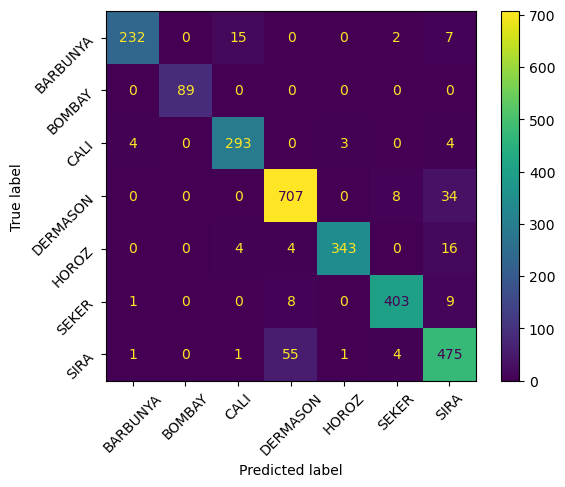

Classification Report
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.91      0.94       256
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.94      0.96      0.95       304
    DERMASON       0.91      0.94      0.93       749
       HOROZ       0.99      0.93      0.96       367
       SEKER       0.97      0.96      0.96       421
        SIRA       0.87      0.88      0.88       537

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.95      2723
weighted avg       0.93      0.93      0.93      2723



In [34]:
svm_acc_opt,svm_pre_opt,svm_rec_opt,svm_f1_opt=compute_metrics(svc_model_opt,x_test,y_test)

In [35]:
KFold_crossvalidation(svc_model_opt,x_test,y_test)

F1 score of SVC(C=5, gamma=0.1, probability=True) is [0.92793396 0.94026791 0.92973638 0.9473156  0.94048254] 


DECISION TREE CLASSIFIER

In [36]:
#DESCION TREE model
dt_class= DecisionTreeClassifier(max_leaf_nodes=10,random_state=2)
dt_class.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=2)

Accuracy:  0.8872567021667279
Precision:  0.9093362703651104
Recall:  0.8900869121913634
F1 Score:  0.8980899071651162


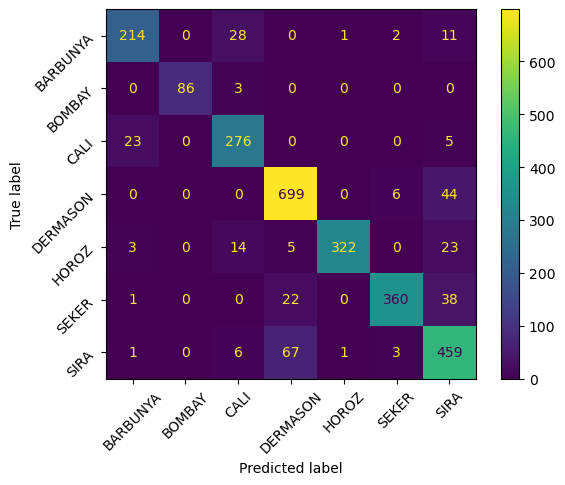

Classification Report
              precision    recall  f1-score   support

    BARBUNYA       0.88      0.84      0.86       256
      BOMBAY       1.00      0.97      0.98        89
        CALI       0.84      0.91      0.87       304
    DERMASON       0.88      0.93      0.91       749
       HOROZ       0.99      0.88      0.93       367
       SEKER       0.97      0.86      0.91       421
        SIRA       0.79      0.85      0.82       537

    accuracy                           0.89      2723
   macro avg       0.91      0.89      0.90      2723
weighted avg       0.89      0.89      0.89      2723



In [37]:
dt_acc,dt_pre,dt_rec,dt_f1=compute_metrics(dt_class,x_test,y_test)

In [38]:
KFold_crossvalidation(dt_class,x_test,y_test)

F1 score of DecisionTreeClassifier(max_leaf_nodes=10, random_state=2) is [0.90167396 0.88843665 0.86492115 0.87509245 0.86851894] 


In [39]:
#optimizing decision tree
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

param_grid = {
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"],
               "max_leaf_nodes":randint(7,18),
               "random_state":randint(1,5)}

gridSearch = RandomizedSearchCV(dt_class, n_iter=30, param_distributions=param_grid, scoring='accuracy', n_jobs=-1,
                                 cv=5, verbose=2, random_state=12)
gridSearch.fit(x_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Score:  0.8923566900474237
Parameters:  {'criterion': 'gini', 'max_features': 6, 'max_leaf_nodes': 17, 'min_samples_leaf': 2, 'random_state': 4}


In [40]:
#optimized decision tree
dt_op_class= DecisionTreeClassifier(max_leaf_nodes=17,random_state=4,criterion='gini',max_features=6,min_samples_leaf=2)
dt_op_class.fit(x_train,y_train)

DecisionTreeClassifier(max_features=6, max_leaf_nodes=17, min_samples_leaf=2,
                       random_state=4)

Accuracy:  0.8931325743665075
Precision:  0.9064344516411282
Recall:  0.8967890882478577
F1 Score:  0.900266700722905


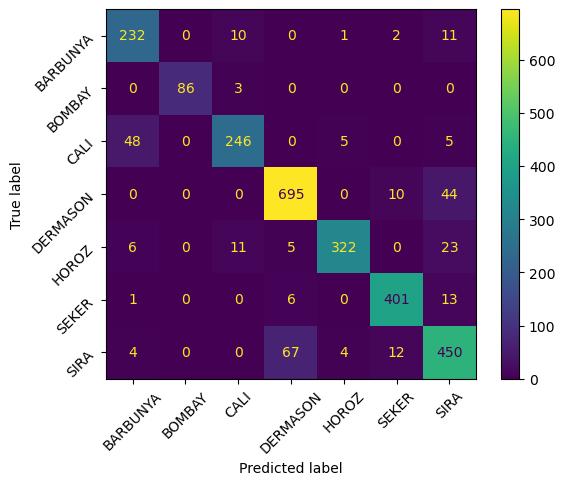

Classification Report
              precision    recall  f1-score   support

    BARBUNYA       0.80      0.91      0.85       256
      BOMBAY       1.00      0.97      0.98        89
        CALI       0.91      0.81      0.86       304
    DERMASON       0.90      0.93      0.91       749
       HOROZ       0.97      0.88      0.92       367
       SEKER       0.94      0.95      0.95       421
        SIRA       0.82      0.84      0.83       537

    accuracy                           0.89      2723
   macro avg       0.91      0.90      0.90      2723
weighted avg       0.90      0.89      0.89      2723



In [41]:
dt_op_acc,dt_op_pre,dt_op_rec,dt_op_f1=compute_metrics(dt_op_class,x_test,y_test)

In [42]:
KFold_crossvalidation(dt_op_class,x_test,y_test)

F1 score of DecisionTreeClassifier(max_features=6, max_leaf_nodes=17, min_samples_leaf=2,
                       random_state=4) is [0.92329412 0.88774638 0.87430727 0.89501518 0.86215   ] 


In [43]:
metricdf=[[svm_acc,svm_pre,svm_rec,svm_f1],[svm_acc_opt,svm_pre_opt,svm_rec_opt,svm_f1_opt],[dt_acc,dt_pre,dt_rec,dt_f1],[dt_op_acc,dt_op_pre,dt_op_rec,dt_op_f1]]
evaluation_df = pd.DataFrame(metricdf,columns=['Accuracy','Precision','Recall','F1_score'], index=['SVM','SVM Optimized','Decision Tree','Decision Tree Optimized'])
evaluation_df

,Accuracy,Precision,Recall,F1_score
SVM,0.935365,0.951798,0.943331,0.947203
SVM Optimized,0.933529,0.950113,0.941483,0.945437
Decision Tree,0.887257,0.909336,0.890087,0.898090
Decision Tree Optimized,0.893133,0.906434,0.896789,0.900267


BARPLOT COMPARISON OF THE MODELS

[Text(0, 0, 'SVM'),
 Text(1, 0, 'SVM Optimized'),
 Text(2, 0, 'Decision Tree'),
 Text(3, 0, 'Decision Tree Optimized')]

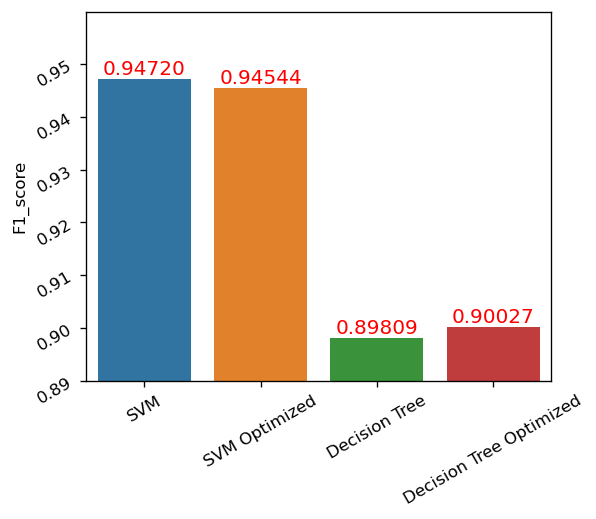

In [44]:
fig, ax = plt.subplots(1, figsize=(5,4 ), dpi=120)
ax.tick_params(axis='both', rotation=30)
cplot = sns.barplot(x=evaluation_df.index.values,y=evaluation_df['F1_score'], ax=ax)
axe = plt.gca()
plt.ylim(0.8899,0.9599)
for p in axe.patches:
    axe.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.5f}'.format(p.get_height()), 
        fontsize=12, color='red', ha='center', va='bottom')
cplot.set_xticklabels(cplot.get_xticklabels(), rotation = 30)

In [45]:
finaltest_df=pd.DataFrame({'ID': ids_test})
finaltest_df

,ID
2894,2894
3683,3683
8012,8012
199,199
13545,13545
...,...
13551,13551
13260,13260
6281,6281
6876,6876


In [46]:
finaltest_df['Predicted Label'] = la_en.inverse_transform(y_predict)
finaltest_df
#test_df['ID']=ids_test
finaltest_df

,ID,Predicted Label
2894,2894,BARBUNYA
3683,3683,BOMBAY
8012,8012,SIRA
199,199,SEKER
13545,13545,SIRA
...,...,...
13551,13551,SIRA
13260,13260,DERMASON
6281,6281,HOROZ
6876,6876,HOROZ


In [48]:
finaltest_df[['ID', 'Predicted Label']].to_csv('output.csv',index=False)

[CV] END ........C=0.01, gamma=0, kernel=rbf, random_state=1; total time=  47.0s
[CV] END .....C=0.01, gamma=0.01, kernel=rbf, random_state=1; total time=  46.7s
[CV] END ........C=0.01, gamma=5, kernel=rbf, random_state=1; total time= 1.2min
[CV] END .......C=0.01, gamma=10, kernel=rbf, random_state=1; total time= 1.3min
[CV] END .......C=0.1, gamma=0.1, kernel=rbf, random_state=1; total time=  12.9s
[CV] END .......C=0.1, gamma=0.1, kernel=rbf, random_state=1; total time=  12.6s
[CV] END .........C=0.1, gamma=5, kernel=rbf, random_state=1; total time= 1.2min
[CV] END ........C=0.1, gamma=10, kernel=rbf, random_state=1; total time= 1.4min
[CV] END ...........C=1, gamma=1, kernel=rbf, random_state=1; total time=  23.6s
[CV] END ..........C=1, gamma=10, kernel=rbf, random_state=1; total time= 1.5min
[CV] END ...........C=5, gamma=0, kernel=rbf, random_state=1; total time=  46.9s
[CV] END ...........C=5, gamma=1, kernel=rbf, random_state=1; total time=  22.9s
[CV] END ..........C=5, gamm

[CV] END .....C=0.01, gamma=0.01, kernel=rbf, random_state=1; total time=  49.7s
[CV] END ......C=0.01, gamma=0.1, kernel=rbf, random_state=1; total time=  30.9s
[CV] END ........C=0.01, gamma=1, kernel=rbf, random_state=1; total time=  59.7s
[CV] END .......C=0.01, gamma=10, kernel=rbf, random_state=1; total time= 1.3min
[CV] END ......C=0.1, gamma=0.01, kernel=rbf, random_state=1; total time=  18.8s
[CV] END ......C=0.1, gamma=0.01, kernel=rbf, random_state=1; total time=  20.5s
[CV] END .........C=0.1, gamma=1, kernel=rbf, random_state=1; total time=  33.7s
[CV] END ........C=0.1, gamma=10, kernel=rbf, random_state=1; total time= 1.4min
[CV] END ...........C=1, gamma=0, kernel=rbf, random_state=1; total time=  50.6s
[CV] END ...........C=1, gamma=5, kernel=rbf, random_state=1; total time= 1.3min
[CV] END ...........C=5, gamma=0, kernel=rbf, random_state=1; total time=  48.9s
[CV] END ........C=5, gamma=0.01, kernel=rbf, random_state=1; total time=   6.2s
[CV] END .........C=5, gamma